In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('/Users/katiexn/Downloads/NYC Schools -2021 Hackathon.xlsx')

In [4]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,Exceeding Target,0.91,Exceeding Target,0.85,Meeting Target,0.94,Exceeding Target,Approaching Target,2.14,2.17
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,NaN,0.90,Exceeding Target,0.86,Meeting Target,0.94,Meeting Target,Exceeding Target,2.63,2.98
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,Approaching Target,0.61,Not Meeting Target,0.80,Approaching Target,0.79,Not Meeting Target,Approaching Target,2.39,2.54
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,Meeting Target,0.73,Approaching Target,0.89,Meeting Target,0.88,Meeting Target,Exceeding Target,2.48,2.47
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,Meeting Target,0.81,Meeting Target,0.89,Meeting Target,0.93,Meeting Target,Meeting Target,2.38,2.54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Adjusted Grade                          2 non-null      object 
 1   New?                                    27 non-null     object 
 2   Other Location Code in LCGMS            1 non-null      object 
 3   School Name                             1272 non-null   object 
 4   SED Code                                1272 non-null   int64  
 5   Location Code                           1272 non-null   object 
 6   District                                1272 non-null   int64  
 7   Latitude                                1272 non-null   float64
 8   Longitude                               1272 non-null   float64
 9   Address (Full)                          1272 non-null   object 
 10  City                                    1272 non-null   obje

In [6]:
df.shape

(1272, 35)

In [7]:
df.columns

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip', 'Grades', 'Grade Low', 'Grade High',
       'Community School?', 'Economic Need Index', 'School Income Estimate',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Rigorous Instruction %', 'Rigorous Instruction Rating',
       'Collaborative Teachers %', 'Collaborative Teachers Rating',
       'Supportive Environment %', 'Supportive Environment Rating',
       'Effective School Leadership %', 'Effective School Leadership Rating',
       'Strong Family-Community Ties %', 'Strong Family-Community Ties Rating',
       'Trust %', 'Trust Rating', 'Student Achievement Rating',
       'Average ELA Proficiency', 'Average Math Proficiency'],
      dtype='object')

In [8]:
community_school = df[df['Community School?'] == 'Yes']
non_comm_school = df[df['Community School?'] == 'No']

In [14]:
df.isnull().sum()

Adjusted Grade                            1270
New?                                      1245
Other Location Code in LCGMS              1271
School Name                                  0
SED Code                                     0
Location Code                                0
District                                     0
Latitude                                     0
Longitude                                    0
Address (Full)                               0
City                                         0
Zip                                          0
Grades                                       0
Grade Low                                    0
Grade High                                   0
Community School?                            0
Economic Need Index                         25
School Income Estimate                     396
Student Attendance Rate                     25
Percent of Students Chronically Absent      25
Rigorous Instruction %                      25
Rigorous Inst

In [15]:
df1 = pd.read_excel('/Users/katiexn/Downloads/NYC Schools -2021 Hackathon.xlsx', sheet_name='GenEd - Student %')

In [16]:
df2 = pd.read_excel('/Users/katiexn/Downloads/NYC Schools -2021 Hackathon.xlsx', sheet_name='2016 School Explorer')

In [17]:
len(df1)

1139

In [18]:
len(df2)

1272

In [19]:
df1 = df1[df1['School Name'].notnull()]

In [20]:
df1['School Name'] = df1['School Name'].str.upper()

In [21]:
len(df1)

1137

In [22]:
df3 = df1.merge(df2, on='School Name', how ='left')

In [23]:
len(df3)

1138

In [24]:
df4 = df3.groupby(['District']).mean() 
df4

,Total Student Response Rate,SED Code,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency
District,,,,,,,,,,,,,,,,,
1.0,0.923333,3.101002e+11,40.721017,-73.982483,10003.833333,0.701250,41181.998333,0.939167,0.191667,0.814167,0.800833,0.801667,0.753333,0.768333,0.824167,2.637500,2.749167
2.0,0.905417,3.102000e+11,40.742678,-73.984373,10033.000000,0.413500,81596.081250,0.955000,0.112083,0.901667,0.911667,0.880417,0.865000,0.830833,0.922500,3.027500,3.139167
3.0,0.847083,3.103002e+11,40.794379,-73.965584,10025.125000,0.607000,53920.616364,0.853478,0.262609,0.886957,0.878261,0.866957,0.833913,0.863043,0.907391,2.736087,2.808696
4.0,0.860000,3.104002e+11,40.794652,-73.941457,10031.000000,0.779762,31517.720667,0.880476,0.282857,0.891905,0.885238,0.871905,0.825238,0.837143,0.903810,2.546190,2.645714
5.0,0.741905,3.105005e+11,40.815514,-73.946941,10030.238095,0.772714,31877.686667,0.843810,0.291905,0.873810,0.890476,0.842857,0.832857,0.833810,0.902381,2.494762,2.670476
6.0,0.934167,3.106002e+11,40.849654,-73.933122,10034.041667,0.783083,46522.433333,0.941667,0.156250,0.880417,0.884583,0.879167,0.821250,0.837500,0.909583,2.360833,2.477500
7.0,0.858824,3.207003e+11,40.815240,-73.918305,10453.117647,0.856437,26576.712000,0.866875,0.298750,0.880000,0.872500,0.849375,0.816875,0.808125,0.898750,2.358750,2.450625
8.0,0.888500,3.208001e+11,40.823237,-73.862791,10467.350000,0.761600,35156.882500,0.917500,0.279500,0.849500,0.845500,0.841500,0.780500,0.786500,0.879000,2.392000,2.359500
9.0,0.876471,3.209002e+11,40.837243,-73.911478,10454.970588,0.849382,26680.590000,0.890294,0.284118,0.854412,0.837647,0.853235,0.782941,0.800588,0.883824,2.332941,2.421176


In [26]:
df4.describe() 
df4 
#We take a look at the mean ELA Math and ENI Scores for each district  
#We then look at the poorest district (above 75th percentile) and analyze their survey

,Total Student Response Rate,SED Code,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency
District,,,,,,,,,,,,,,,,,
1.0,0.923333,3.101002e+11,40.721017,-73.982483,10003.833333,0.701250,41181.998333,0.939167,0.191667,0.814167,0.800833,0.801667,0.753333,0.768333,0.824167,2.637500,2.749167
2.0,0.905417,3.102000e+11,40.742678,-73.984373,10033.000000,0.413500,81596.081250,0.955000,0.112083,0.901667,0.911667,0.880417,0.865000,0.830833,0.922500,3.027500,3.139167
3.0,0.847083,3.103002e+11,40.794379,-73.965584,10025.125000,0.607000,53920.616364,0.853478,0.262609,0.886957,0.878261,0.866957,0.833913,0.863043,0.907391,2.736087,2.808696
4.0,0.860000,3.104002e+11,40.794652,-73.941457,10031.000000,0.779762,31517.720667,0.880476,0.282857,0.891905,0.885238,0.871905,0.825238,0.837143,0.903810,2.546190,2.645714
5.0,0.741905,3.105005e+11,40.815514,-73.946941,10030.238095,0.772714,31877.686667,0.843810,0.291905,0.873810,0.890476,0.842857,0.832857,0.833810,0.902381,2.494762,2.670476
6.0,0.934167,3.106002e+11,40.849654,-73.933122,10034.041667,0.783083,46522.433333,0.941667,0.156250,0.880417,0.884583,0.879167,0.821250,0.837500,0.909583,2.360833,2.477500
7.0,0.858824,3.207003e+11,40.815240,-73.918305,10453.117647,0.856437,26576.712000,0.866875,0.298750,0.880000,0.872500,0.849375,0.816875,0.808125,0.898750,2.358750,2.450625
8.0,0.888500,3.208001e+11,40.823237,-73.862791,10467.350000,0.761600,35156.882500,0.917500,0.279500,0.849500,0.845500,0.841500,0.780500,0.786500,0.879000,2.392000,2.359500
9.0,0.876471,3.209002e+11,40.837243,-73.911478,10454.970588,0.849382,26680.590000,0.890294,0.284118,0.854412,0.837647,0.853235,0.782941,0.800588,0.883824,2.332941,2.421176


In [92]:
## Poorest District

In [27]:
df4[df4['Economic Need Index'] > 0.777940]

,Total Student Response Rate,SED Code,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency
District,,,,,,,,,,,,,,,,,
4.0,0.860000,3.104002e+11,40.794652,-73.941457,10031.000000,0.779762,31517.720667,0.880476,0.282857,0.891905,0.885238,0.871905,0.825238,0.837143,0.903810,2.546190,2.645714
6.0,0.934167,3.106002e+11,40.849654,-73.933122,10034.041667,0.783083,46522.433333,0.941667,0.156250,0.880417,0.884583,0.879167,0.821250,0.837500,0.909583,2.360833,2.477500
7.0,0.858824,3.207003e+11,40.815240,-73.918305,10453.117647,0.856437,26576.712000,0.866875,0.298750,0.880000,0.872500,0.849375,0.816875,0.808125,0.898750,2.358750,2.450625
9.0,0.876471,3.209002e+11,40.837243,-73.911478,10454.970588,0.849382,26680.590000,0.890294,0.284118,0.854412,0.837647,0.853235,0.782941,0.800588,0.883824,2.332941,2.421176
10.0,0.914333,3.210001e+11,40.865708,-73.898111,10460.900000,0.833483,35824.567778,0.930345,0.235862,0.877586,0.862759,0.851034,0.801724,0.804483,0.894828,2.349655,2.393793
12.0,0.897143,3.212001e+11,40.835127,-73.890207,10459.238095,0.845095,26424.736000,0.913810,0.286667,0.850952,0.865238,0.824286,0.821429,0.802381,0.892381,2.277143,2.310476
23.0,0.888261,3.322741e+11,40.669693,-73.911972,11220.217391,0.795478,33121.281667,0.914348,0.296087,0.912174,0.908696,0.856087,0.856522,0.842609,0.913478,2.358696,2.428696
32.0,0.942500,3.332002e+11,40.695865,-73.915924,11222.000000,0.792500,37837.465000,0.932500,0.208333,0.888333,0.892500,0.882500,0.815833,0.808333,0.918333,2.441667,2.507500


## Looking at the survey Responses From Schools that are the Poorest

In [28]:
df5 = pd.read_csv('/Users/katiexn/Desktop/Data Science/Data for Good JPM/df_poor_districts.csv')

In [29]:
len(df1)

1137

In [30]:
len(df5)

216

In [31]:
df6 = df1.merge(df5, on='School Name', how='right')

In [32]:
df6

,DBN,School Name,Total Student Response Rate,"1a. This school offers a wide enough variety of programs, classes and activities to keep me interested in school.",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,"1b. The programs, classes, and activities at this school encourage students to develop talent outside academics.",Unnamed: 9,...,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency
0,01M140,P.S. 140 NATHAN STRAUS,0.91,0.05,0.08,0.56,0.24,0.07,0.03,0.15,...,Meeting Target,0.87,Meeting Target,0.83,Meeting Target,0.93,Meeting Target,Meeting Target,2.21,2.27
1,02M655,LIFE SCIENCES SECONDARY SCHOOL,0.65,0.07,0.25,0.54,0.09,0.06,0.04,0.24,...,Approaching Target,0.67,Not Meeting Target,0.65,Not Meeting Target,0.81,Approaching Target,Approaching Target,2.24,1.95
2,03M149,P.S. 149 SOJOURNER TRUTH,0.98,0.26,0.21,0.28,0.18,0.08,0.2,0.21,...,Approaching Target,0.60,Not Meeting Target,0.81,Approaching Target,0.82,Approaching Target,Approaching Target,2.10,2.03
3,03M191,P.S. 191 AMSTERDAM,0.97,0.02,0.09,0.61,0.23,0.05,0.02,0.09,...,Approaching Target,0.70,Approaching Target,0.88,Meeting Target,0.88,Meeting Target,Approaching Target,2.23,2.10
4,03M415,WADLEIGH SECONDARY SCHOOL FOR THE PERFORMING &...,0.68,0.04,0.13,0.55,0.23,0.05,0.03,0.11,...,Meeting Target,0.71,Approaching Target,0.77,Meeting Target,0.82,Approaching Target,Approaching Target,2.04,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,NaN,P.S. 044 THOMAS C. BROWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Approaching Target,0.72,Approaching Target,0.81,Approaching Target,0.90,Meeting Target,Meeting Target,2.11,2.18
212,NaN,P.S. 78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not Meeting Target,0.85,Meeting Target,0.84,Meeting Target,0.94,Exceeding Target,NaN,2.11,2.20
213,NaN,P.S. 151 LYNDON B. JOHNSON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Meeting Target,0.78,Meeting Target,0.87,Meeting Target,0.89,Meeting Target,Approaching Target,2.02,2.10
214,NaN,BRONX CHARTER SCHOOL FOR CHILDREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Meeting Target,0.84,Meeting Target,0.85,Meeting Target,0.96,Exceeding Target,Approaching Target,2.21,2.29


In [39]:
df7 = df6.groupby(['District','Student Achievement Rating']).mean()

In [41]:
df7

Total Student Response Rate   Unnamed: 0  \
District Student Achievement Rating                                             
1        Approaching Target                                  NaN     6.000000   
         Meeting Target                                 0.910000     8.000000   
2        Approaching Target                             0.650000    71.000000   
3        Approaching Target                             0.890000   306.200000   
         Not Meeting Target                                  NaN    89.000000   
4        Approaching Target                             0.890000   110.000000   
         Meeting Target                                 0.940000   119.142857   
5        Approaching Target                             0.932000   246.900000   
         Meeting Target                                      NaN   141.000000   
         Not Meeting Target                                  NaN   146.000000   
6        Approaching Target                             0.903333   177.400000   
         Meeting Target                                 0.960000   176.800000   
7        Approaching Target                             0.858000   298.909091   
         Meeting Target                                 0.990000   209.333333   
8        Approaching Target                             0.867500   245.750000   
         Meeting Target                                 0.885000   238.625000   
9        Approaching Target                             0.872000   281.222222   
         Meeting Target                                 0.860000   288.833333   
10       Approaching Target                             0.860000   349.857143   
         Exceeding Target                               0.840000   345.000000   
         Meeting Target                                 0.930000   342.571429   
11       Approaching Target                             0.710000   396.714286   
12       Approaching Target                             0.910000   426.777778   
         Meeting Target                                 0.865000   433.142857   
13       Approaching Target                             0.946667   464.000000   
         Meeting Target                                 0.875000   462.250000   
14       Approaching Target                             0.845000   490.500000   
         Meeting Target                                 0.980000   483.333333   
15       Approaching Target                             0.490000   533.000000   
         Meeting Target                                 0.990000   522.000000   
16       Approaching Target                             0.920000   688.000000   
         Meeting Target                                 0.940000   548.333333   
17       Approaching Target                             0.870000   576.750000   
         Meeting Target                                 0.833333   575.600000   
18       Approaching Target                                  NaN   604.000000   
         Meeting Target                                 0.945000   601.000000   
19       Approaching Target                             0.915000   636.000000   
         Meeting Target                                 0.916667   627.500000   
         Not Meeting Target                             0.880000   632.000000   
21       Approaching Target                             0.860000   714.000000   
22       Approaching Target                                  NaN   744.000000   
23       Approaching Target                             0.941429   757.200000   
         Meeting Target                                 0.910000   767.500000   
         Not Meeting Target                                  NaN   759.000000   
27       Approaching Target                             0.915000   891.750000   
         Meeting Target                                 0.933333   895.666667   
28       Approaching Target                                  NaN   937.000000   
         Meeting Target                                 0.980000   9

NameError: name 'df6' is not defined

In [42]:
! pip install dataframe-image

     |████████████████████████████████| 644 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 60.0 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 15.9 MB/s eta 0:00:01


In [43]:
import dataframe_image as dfi 
dfi.export(df7,'dataframe.png')

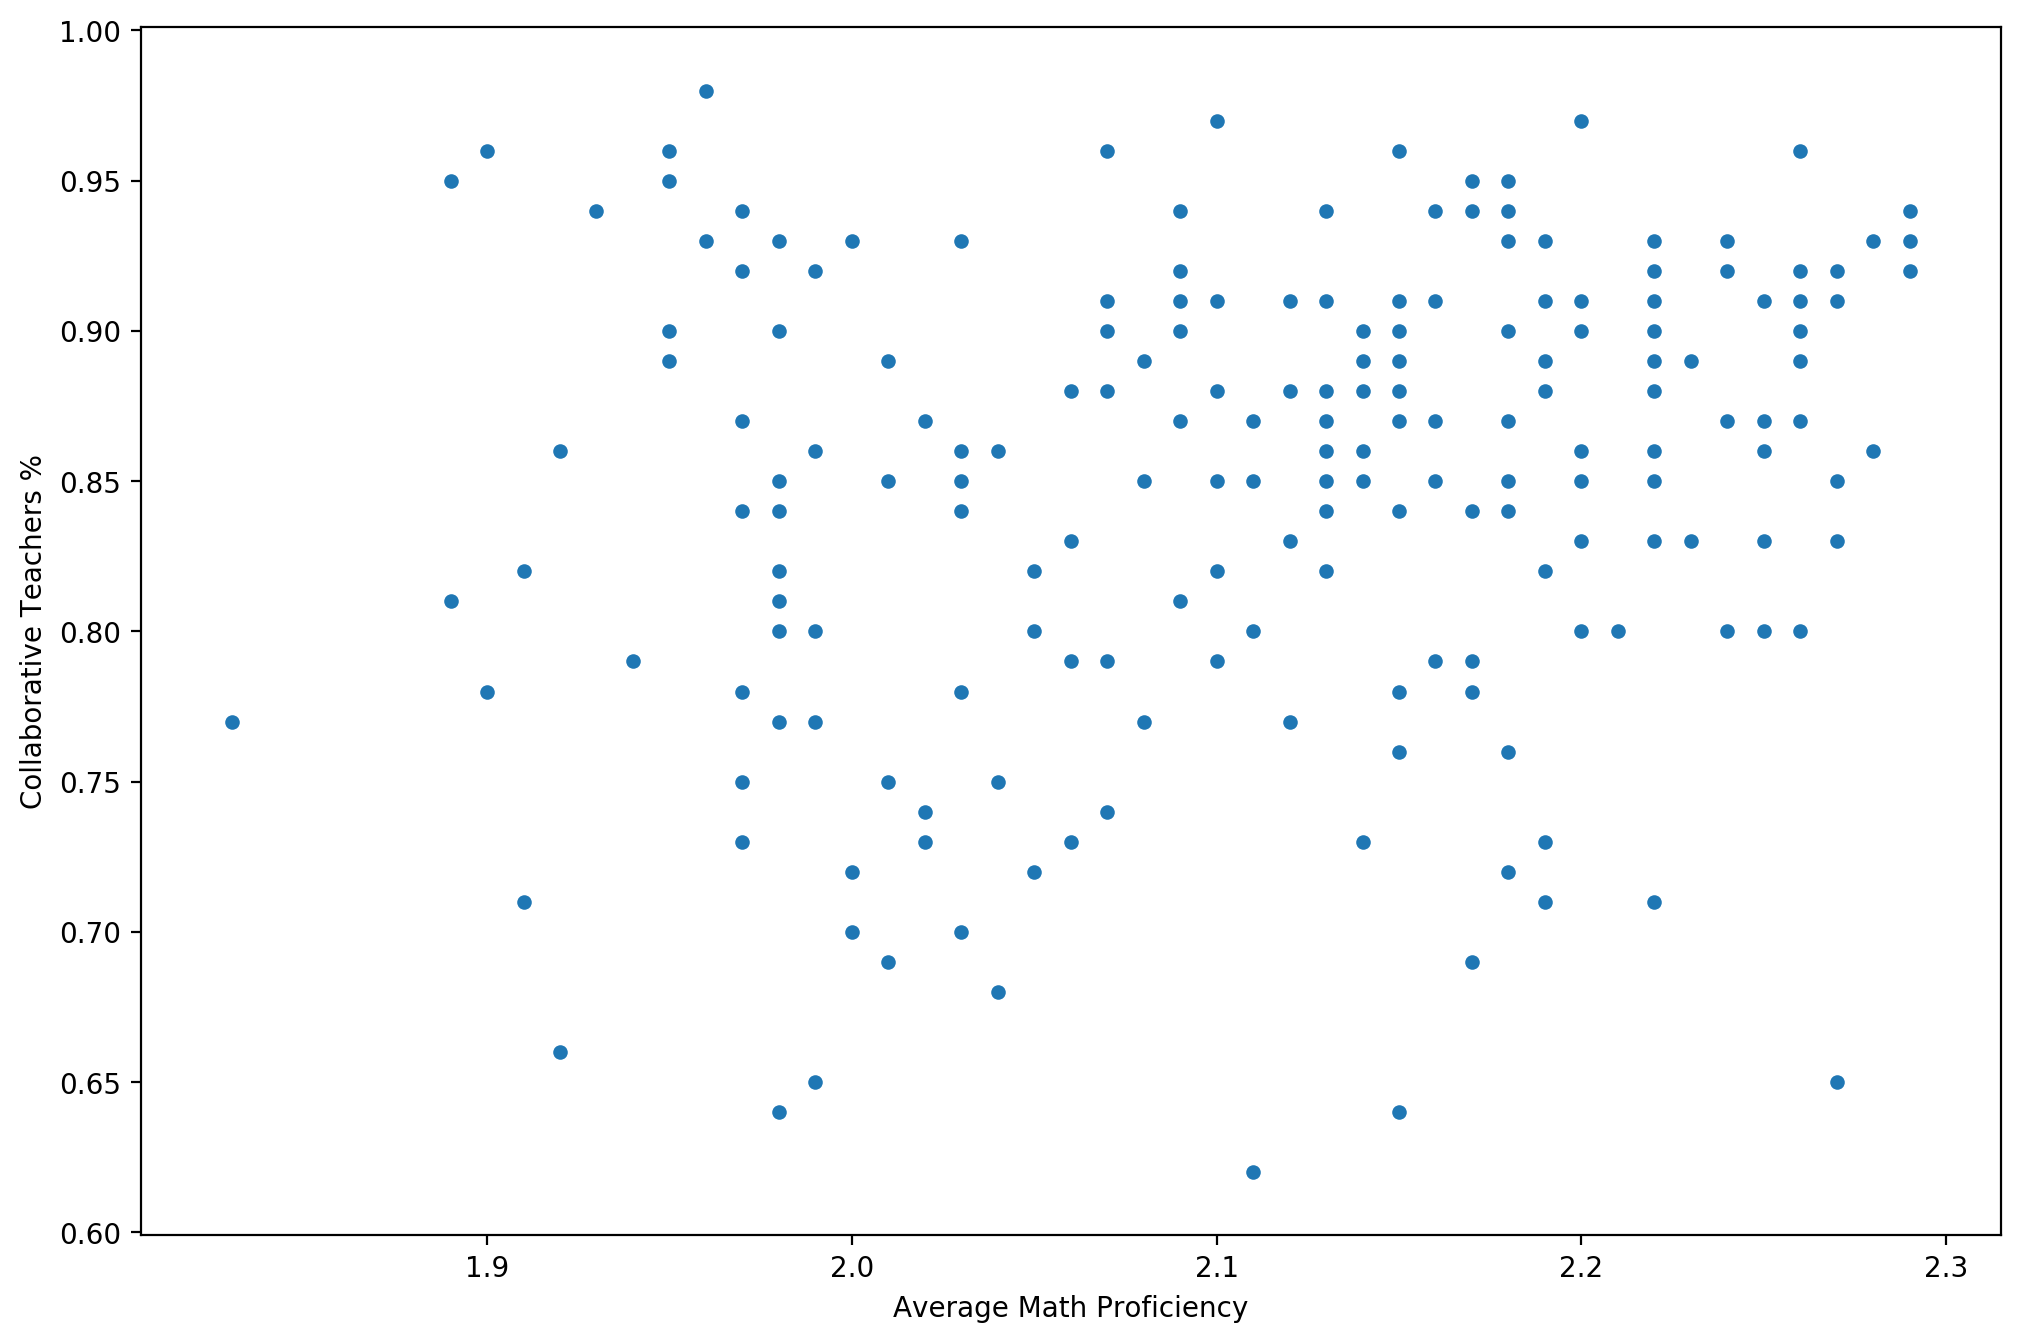

In [46]:
plt.figure(figsize = (12,8),dpi = 200) 
sns.scatterplot(x='Average Math Proficiency',y='Collaborative Teachers %',data = df6)

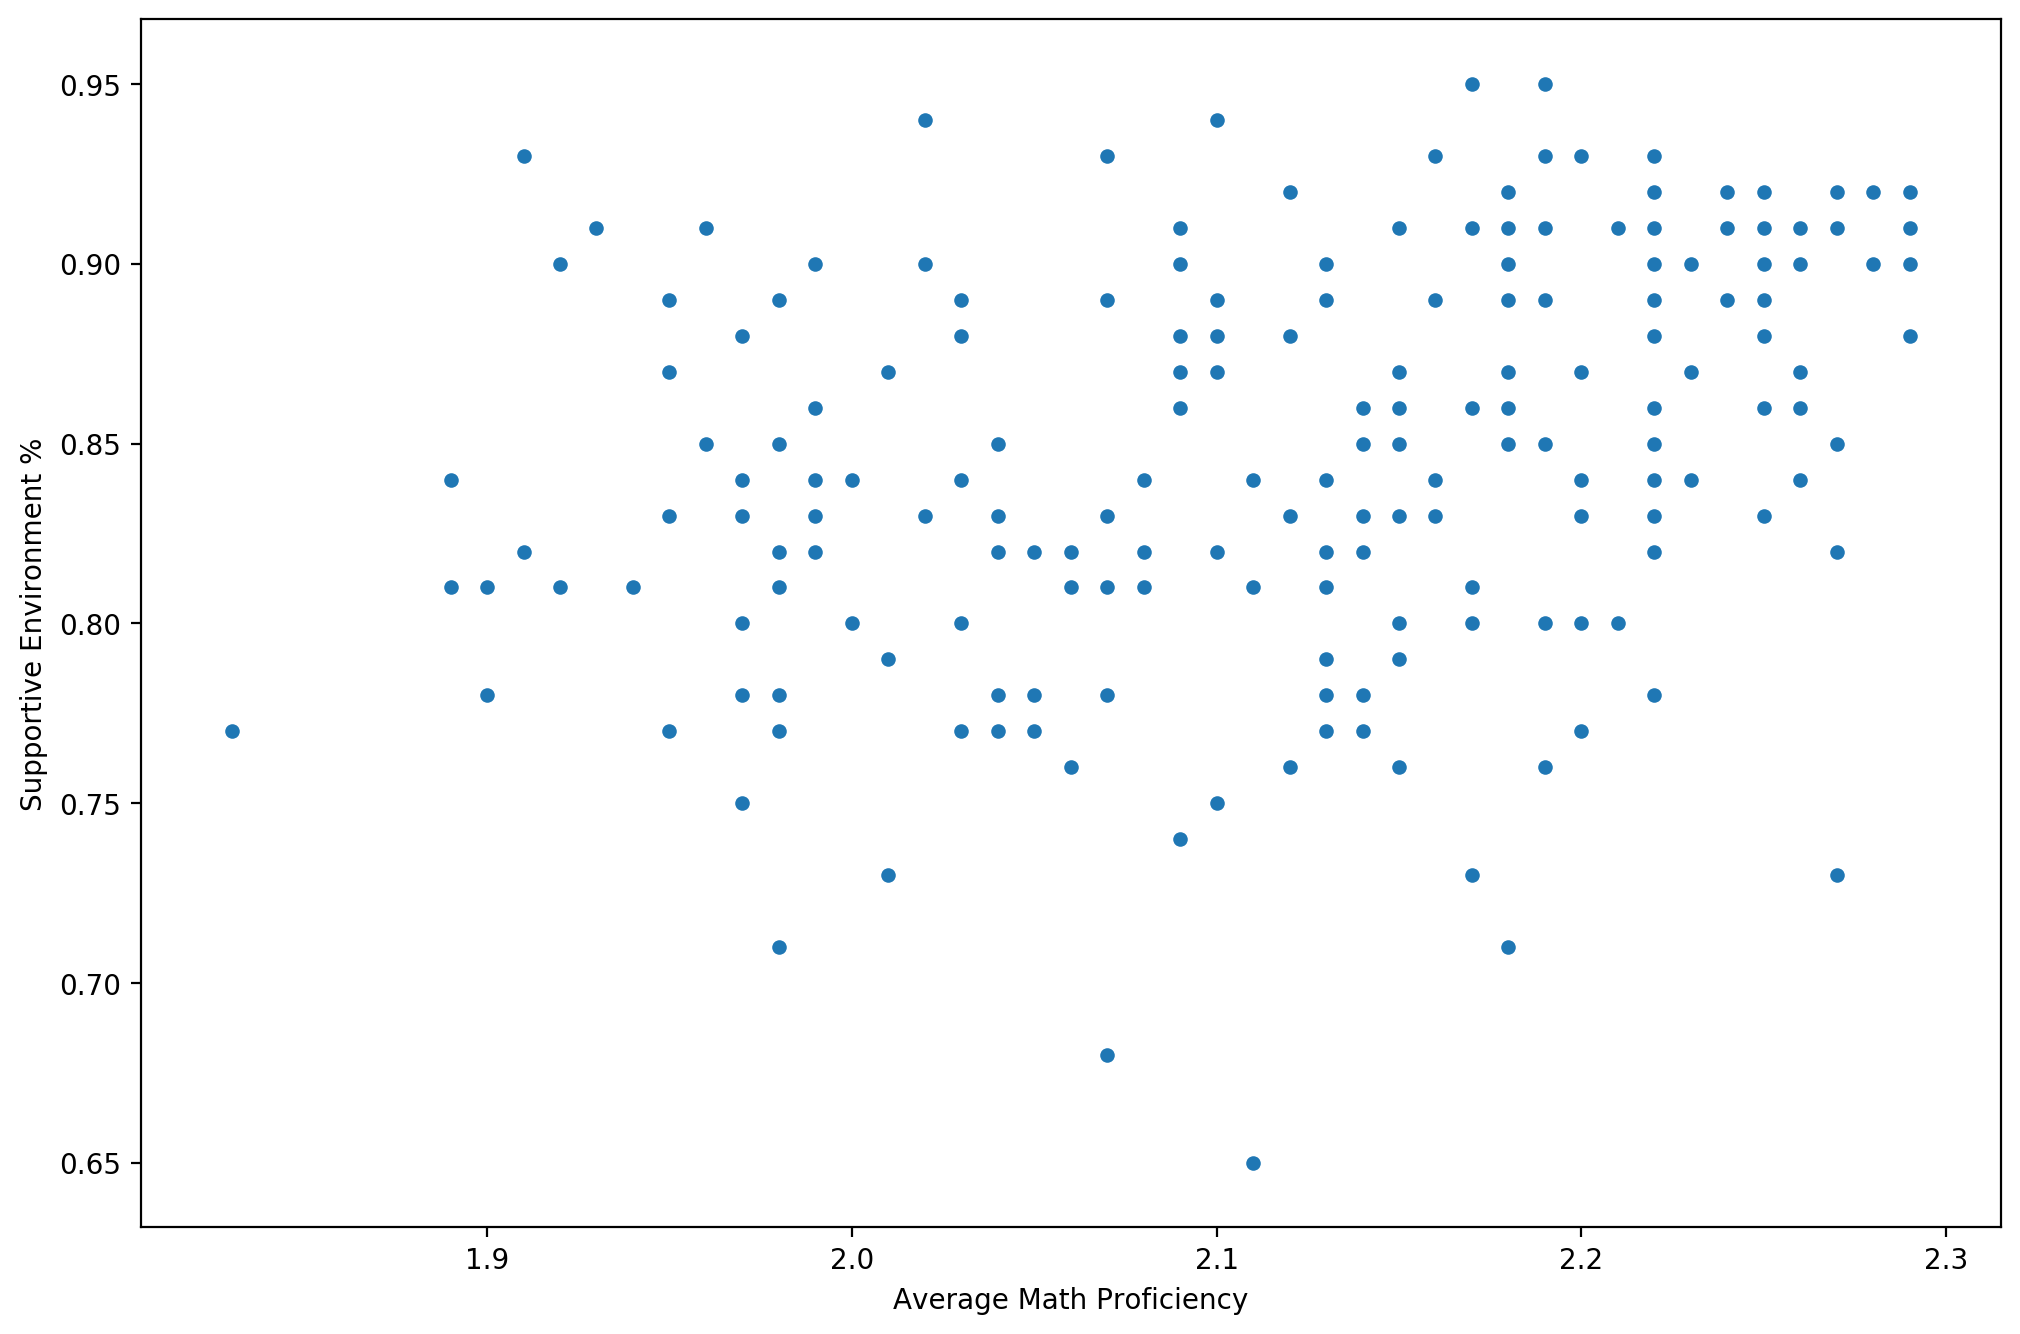

In [47]:
plt.figure(figsize = (12,8),dpi = 200) 
sns.scatterplot(x='Average Math Proficiency',y='Supportive Environment %',data = df6)

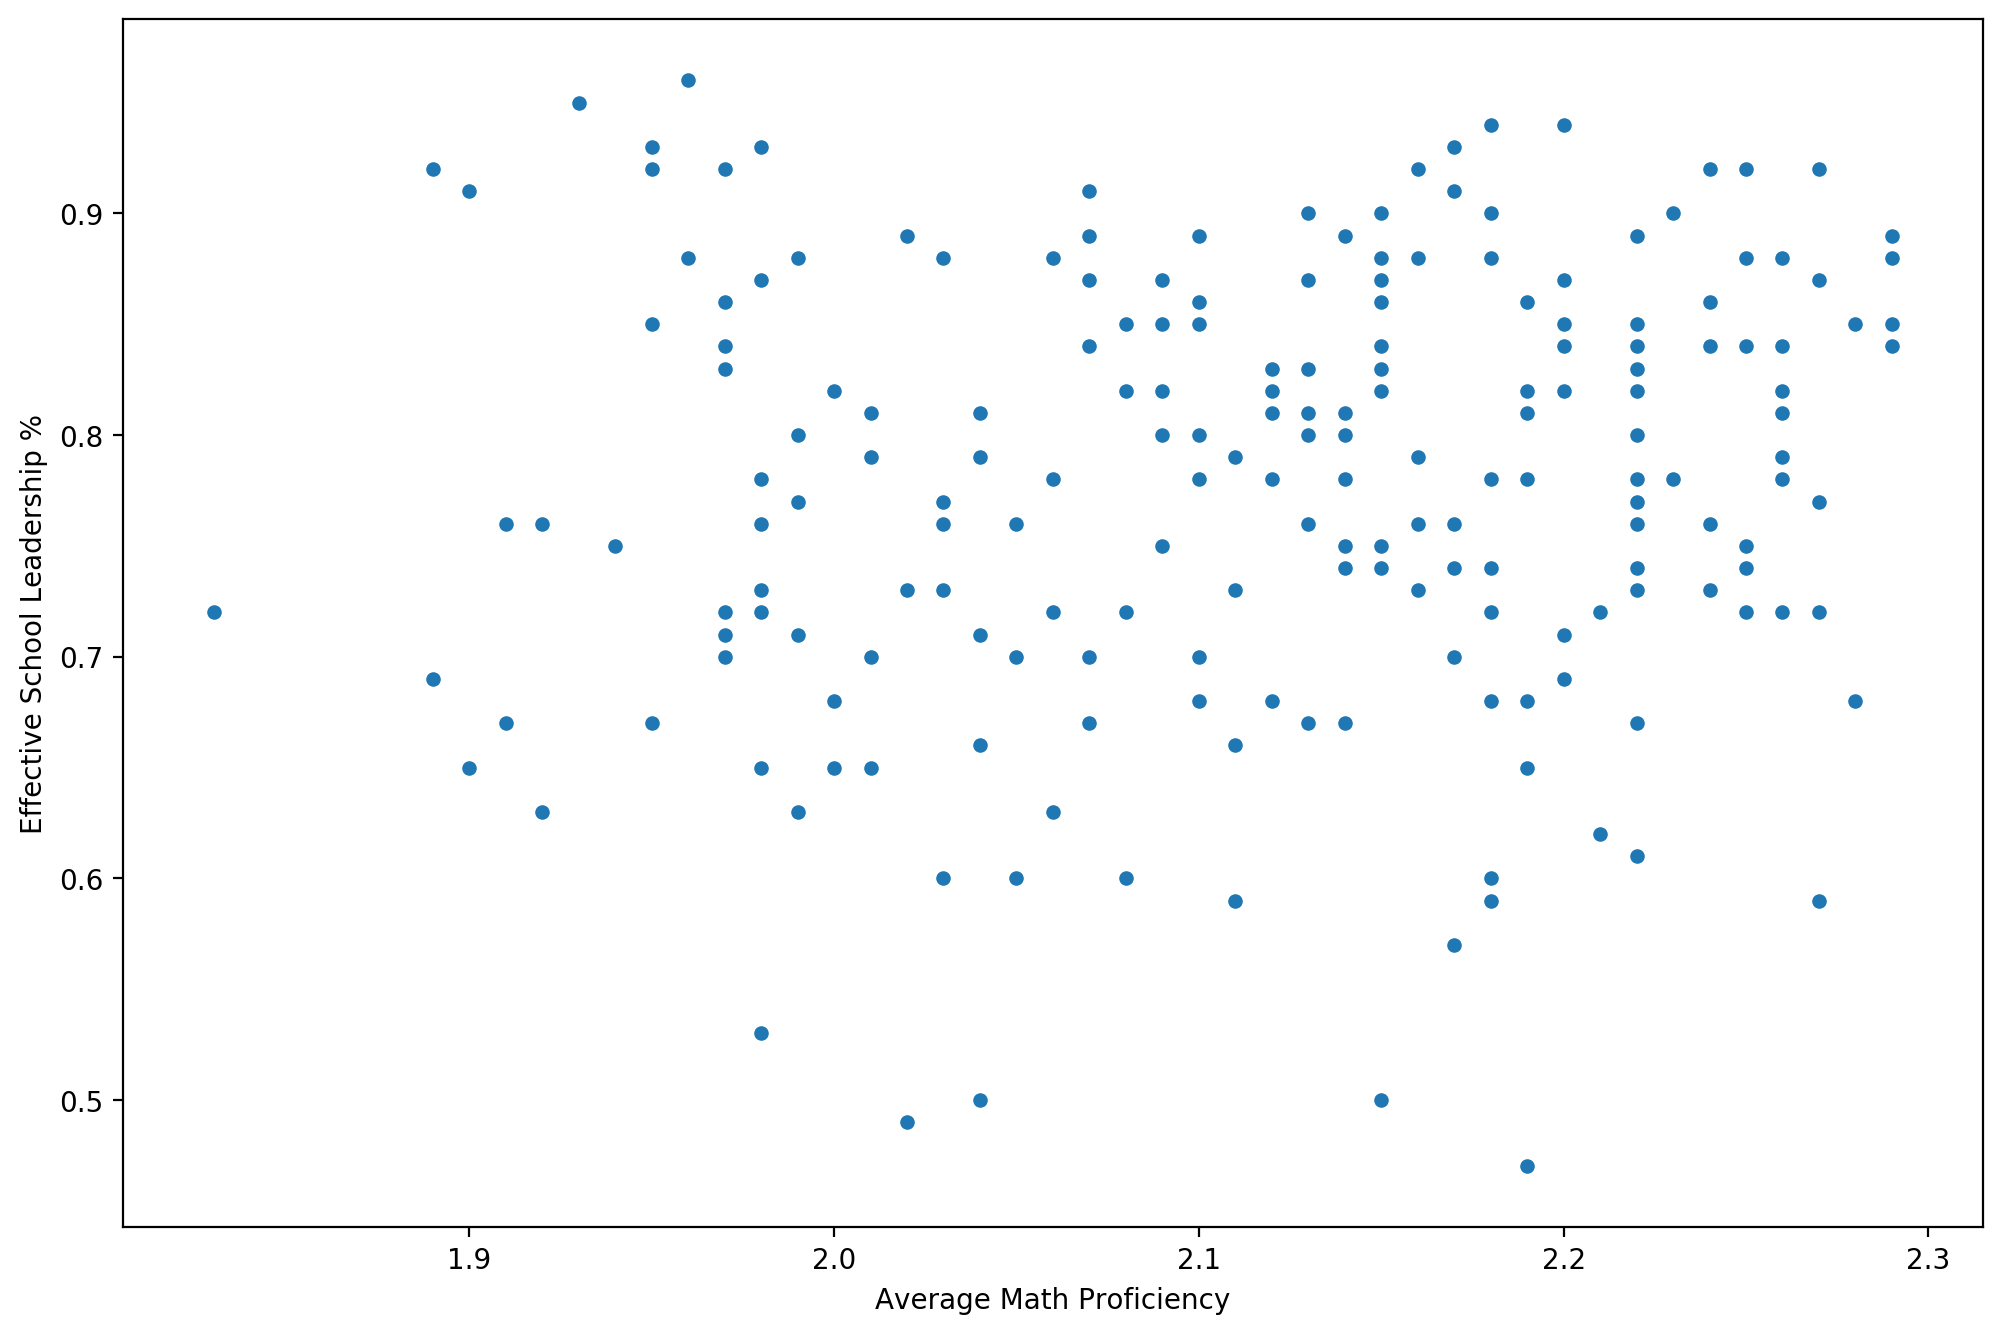

In [48]:
plt.figure(figsize = (12,8),dpi = 200) 
sns.scatterplot(x='Average Math Proficiency',y='Effective School Leadership %',data = df6)